# Part 1 of the technical report is about cleaning the data, adding features and removing outliers and EDA

### Cleaning the data removes the null values, converting to datetime format.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab
from scipy import stats
import seaborn as sns
import datetime as dt
import calendar

%matplotlib inline

bikenyc = pd.read_csv("C:/Users/Monchita/Desktop/Final proj/NYCreal/bikereal.csv")
bikenyc.drop('Unnamed: 0', axis=1,inplace=True)

pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 40)

In [2]:
#Checking to see the shape
bikenyc.shape

(5016896, 15)

In [3]:
#Checking to see all null values

bikenyc.isnull().sum()

tripduration                  0
starttime                     0
stoptime                      0
start station id           1020
start station name         1020
start station latitude        0
start station longitude       0
end station id             1020
end station name           1020
end station latitude          0
end station longitude         0
bikeid                        0
usertype                      0
birth year                    0
gender                        0
dtype: int64

In [4]:
#Dropping all the blank values

bikenyc.dropna(inplace=True)

# Features engineering adds several information

tripduration minutes,
Usertype,
Gender,
Weekday/Weekend,
Workday/Holiday,
Rush hours


In [5]:
#Features engineering
#converting starttime and stoptime into date time format
bikenyc[['starttime','stoptime']] = bikenyc[['starttime','stoptime']].apply(pd.to_datetime)

In [6]:
#Putting in the original tripduration, which was counted in second, in minutes format

bikenyc['tripduration_minutes'] = bikenyc['tripduration'].apply(lambda x: x/60)

In [7]:
#Putting in the usertype dummy variables
#User Type (Customer = 24-hour pass or 3-day pass user; Subscriber = Annual Member)

dummiesuser = pd.get_dummies(bikenyc['usertype'])

bikenyc= pd.concat([bikenyc, dummiesuser], axis=1)

In [8]:
#Putting in the gender dummy variables
#Gender (0=unknown; 1=male; 2=female)

dummiesgender = pd.get_dummies(bikenyc['gender'])

bikenyc = pd.concat([bikenyc, dummiesgender], axis=1)
bikenyc = bikenyc.rename(columns={0:'Gender_unknown',1:'Gender_male',2:'Gender_female'})

In [9]:
#Dropping the gender unknown
print(bikenyc[(bikenyc['Gender_unknown']==1)].shape) #There are 366,128 Gender Unknown so we need to drop them

print(bikenyc[(bikenyc['Gender_unknown']==0)].shape) #There are 4,649,748 Gender known so need to retain them
 
print(bikenyc.shape)

bikenyc = bikenyc[(bikenyc['Gender_unknown']==0)]
print(bikenyc.shape) # successfully removed gender unknown

(366128, 21)
(4649748, 21)
(5015876, 21)
(4649748, 21)


In [10]:
#Putting in columns for the day of the week of starting the rental
#checking to see how many are rented during the day

dummies = pd.get_dummies(bikenyc['starttime'].dt.dayofweek, prefix='startday')
dummies.columns = ['Monday', 'Tuesday', 'Wednesday', 'Thursday','Friday','Saturday', 'Sunday']
dummies.sum()

Monday       648162
Tuesday      698793
Wednesday    781515
Thursday     713714
Friday       694469
Saturday     567382
Sunday       545713
dtype: int64

In [11]:
bikenyc= pd.concat([bikenyc, dummies], axis=1)

In [12]:
#Putting in the holiday dummies - this is from www.officeholidays.com

bikenyc['holiday'] = np.where(
                                   (pd.to_datetime(bikenyc['starttime'].dt.date) == '2018-09-03') |
                                   (pd.to_datetime(bikenyc['starttime'].dt.date) == '2018-10-08') |
                                   (pd.to_datetime(bikenyc['starttime'].dt.date) == '2018-11-12') |
                                   (pd.to_datetime(bikenyc['starttime'].dt.date) == '2018-11-22')
                                    ,1,0)

In [13]:
#Putting in weekend binary

bikenyc['weekend'] = np.where( (bikenyc['Saturday']==1) | (bikenyc['Sunday']==1),1,0)
bikenyc[(bikenyc['weekend']==1)].head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_minutes,Customer,Subscriber,Gender_unknown,Gender_male,Gender_female,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,holiday,weekend
0,1635,2018-09-01 00:00:05.269,2018-09-01 00:27:20.634,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,366.0,Clinton Ave & Myrtle Ave,40.693261,-73.968896,25577,Subscriber,1980,1,27.250000,0,1,0,1,0,0,0,0,0,0,1,0,0,1
2,3337,2018-09-01 00:00:20.649,2018-09-01 00:55:58.547,3142.0,1 Ave & E 62 St,40.761227,-73.960940,3384.0,Smith St & 3 St,40.678724,-73.995991,30496,Subscriber,1975,1,55.616667,0,1,0,1,0,0,0,0,0,0,1,0,0,1
3,436,2018-09-01 00:00:21.746,2018-09-01 00:07:38.583,308.0,St James Pl & Oliver St,40.713079,-73.998512,3690.0,Park Pl & Church St,40.713342,-74.009355,28866,Subscriber,1984,2,7.266667,0,1,0,0,1,0,0,0,0,0,1,0,0,1
4,8457,2018-09-01 00:00:27.315,2018-09-01 02:21:25.308,345.0,W 13 St & 6 Ave,40.736494,-73.997044,380.0,W 4 St & 7 Ave S,40.734011,-74.002939,20943,Customer,1994,1,140.950000,1,0,0,1,0,0,0,0,0,0,1,0,0,1
5,3326,2018-09-01 00:00:29.303,2018-09-01 00:55:56.202,3142.0,1 Ave & E 62 St,40.761227,-73.960940,3384.0,Smith St & 3 St,40.678724,-73.995991,21693,Subscriber,1977,2,55.433333,0,1,0,0,1,0,0,0,0,0,1,0,0,1


In [14]:
#putting in workday

bikenyc['workday'] = np.where( (bikenyc['holiday']==0) & (bikenyc['weekend']==0),1,0)
bikenyc[(bikenyc['workday']==1)].head(2)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_minutes,Customer,Subscriber,Gender_unknown,Gender_male,Gender_female,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,holiday,weekend,workday
170172,433,2018-09-04 00:00:05.000,2018-09-04 00:07:18.020,3331.0,Riverside Dr & W 104 St,40.801343,-73.971146,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,34769,Subscriber,1969,1,7.216667,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1
170173,871,2018-09-04 00:00:07.556,2018-09-04 00:14:39.554,522.0,E 51 St & Lexington Ave,40.757148,-73.972078,403.0,E 2 St & 2 Ave,40.725029,-73.990697,24797,Subscriber,1974,1,14.516667,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1


In [15]:
#http://web.mta.info/nyct/subway/howto_sub.htm

#during rush hours (approximately 6:30 - 9:30 a.m., and approximately 3:30 - 8 p.m., Monday through Friday)

#Setting the rushhours in the morning

bikenyc.set_index(['starttime'],inplace=True)
bikenyc['rushmorning_all'] = np.where(bikenyc.index.isin(bikenyc.between_time('6:30', '09:30').index),1,0)
bikenyc['rushmorning_workday'] = np.where((bikenyc['workday']==1) & (bikenyc['rushmorning_all']==1),1,0)#Setting the rushhours in the evening

bikenyc['rushevening_all'] = np.where(bikenyc.index.isin(bikenyc.between_time('15:30', '20:00').index),1,0)
bikenyc['rushevening_workday'] = np.where((bikenyc['workday']==1) & (bikenyc['rushevening_all']==1),1,0)

In [16]:
bikenyc.reset_index(inplace=True)
bikenyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4649748 entries, 0 to 4649747
Data columns (total 35 columns):
starttime                  datetime64[ns]
tripduration               int64
stoptime                   datetime64[ns]
start station id           float64
start station name         object
start station latitude     float64
start station longitude    float64
end station id             float64
end station name           object
end station latitude       float64
end station longitude      float64
bikeid                     int64
usertype                   object
birth year                 int64
gender                     int64
tripduration_minutes       float64
Customer                   uint8
Subscriber                 uint8
Gender_unknown             uint8
Gender_male                uint8
Gender_female              uint8
Monday                     uint8
Tuesday                    uint8
Wednesday                  uint8
Thursday                   uint8
Friday                     

In [17]:
bikenyc.head()

,starttime,tripduration,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_minutes,Customer,Subscriber,Gender_unknown,Gender_male,Gender_female,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,holiday,weekend,workday,rushmorning_all,rushmorning_workday,rushevening_all,rushevening_workday
0,2018-09-01 00:00:05.269,1635,2018-09-01 00:27:20.634,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,366.0,Clinton Ave & Myrtle Ave,40.693261,-73.968896,25577,Subscriber,1980,1,27.250000,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,2018-09-01 00:00:20.649,3337,2018-09-01 00:55:58.547,3142.0,1 Ave & E 62 St,40.761227,-73.960940,3384.0,Smith St & 3 St,40.678724,-73.995991,30496,Subscriber,1975,1,55.616667,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,2018-09-01 00:00:21.746,436,2018-09-01 00:07:38.583,308.0,St James Pl & Oliver St,40.713079,-73.998512,3690.0,Park Pl & Church St,40.713342,-74.009355,28866,Subscriber,1984,2,7.266667,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,2018-09-01 00:00:27.315,8457,2018-09-01 02:21:25.308,345.0,W 13 St & 6 Ave,40.736494,-73.997044,380.0,W 4 St & 7 Ave S,40.734011,-74.002939,20943,Customer,1994,1,140.950000,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,2018-09-01 00:00:29.303,3326,2018-09-01 00:55:56.202,3142.0,1 Ave & E 62 St,40.761227,-73.960940,3384.0,Smith St & 3 St,40.678724,-73.995991,21693,Subscriber,1977,2,55.433333,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0


## The next section removes the outliers of trip duration and birth year

Text(0.5, 1.0, 'birth year inc. outliers ')

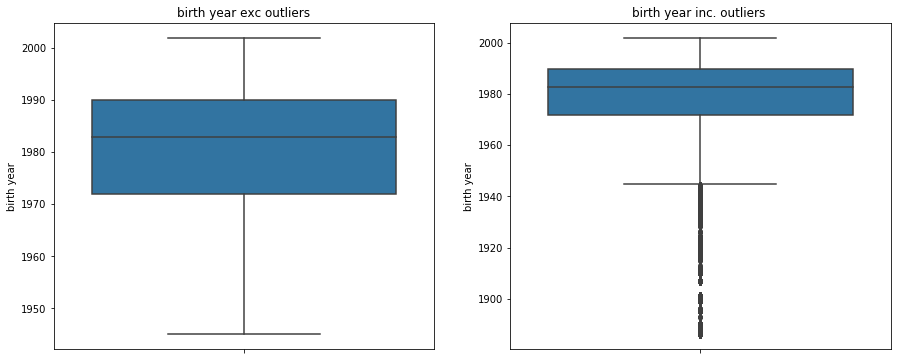

In [18]:
#Check the birthyear outliers - you have people who were 'born' before 1920? Doesn't make sense

fig, axes = plt.subplots(1,2, figsize=(15,6))

sns.boxplot(y='birth year', data=bikenyc,showfliers=False,ax= axes [0]).set_title('birth year exc outliers')
sns.boxplot(y='birth year', data=bikenyc,ax = axes [1]).set_title('birth year inc. outliers ')

In [19]:
#Calculating Quantile of Birth year and looking at lower whisker

print("Q1 quantile: ", bikenyc['birth year'].quantile(0.25)) 
print("Q2 quantile: ", bikenyc['birth year'].quantile(0.50)) #Median
print("Q3 quantile: ", bikenyc['birth year'].quantile(0.75)) 
print("Q4 quantile: ", bikenyc['birth year'].quantile(.80))  



median = bikenyc['birth year'].quantile(0.50)
upper_quartile = bikenyc['birth year'].quantile(0.75)
lower_quartile = bikenyc['birth year'].quantile(0.25)

iqr = upper_quartile - lower_quartile
upper_whisker = bikenyc[bikenyc['birth year']<=upper_quartile+1.5*iqr].max()
lower_whisker = bikenyc[bikenyc['birth year']>=lower_quartile-1.5*iqr].min()
print('')
print(lower_whisker['birth year']) #lower whisker is 1945

Q1 quantile:  1972.0
Q2 quantile:  1983.0
Q3 quantile:  1990.0
Q4 quantile:  1991.0

1945


In [20]:
#Need to drop age that is below 1945 (over 73years old) since they're outliers 
# dropped 15,498 entries

bike_millenial = bikenyc[(bikenyc['birth year']>=1945)]

Text(0.5, 1.0, 'trip duration minutes inc. outliers ')

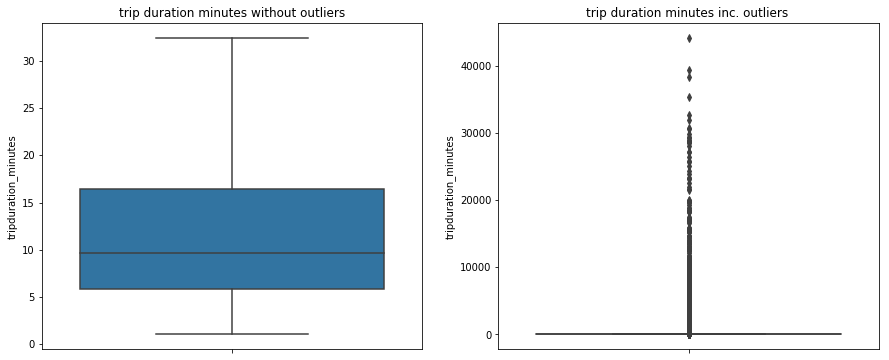

In [21]:
#Removing the trip duration #looking at the outliers


fig, axes = plt.subplots(1,2, figsize=(15,6))

sns.boxplot(y='tripduration_minutes', data=bike_millenial,showfliers=False,ax= axes [0]).set_title('trip duration minutes without outliers')
sns.boxplot(y='tripduration_minutes', data=bike_millenial,ax = axes [1]).set_title('trip duration minutes inc. outliers ')

In [22]:
#Calculating Quantile of tripduration and looking at upper whisker

print("Q1 quantile: ", bike_millenial['tripduration_minutes'].quantile(0.25)) 
print("Q2 quantile: ", bike_millenial['tripduration_minutes'].quantile(0.50)) #Median
print("Q3 quantile: ", bike_millenial['tripduration_minutes'].quantile(0.75)) 
print("Q4 quantile: ", bike_millenial['tripduration_minutes'].quantile(.80))



median = bike_millenial['tripduration_minutes'].quantile(0.50)
upper_quartile = bike_millenial['tripduration_minutes'].quantile(0.75)
lower_quartile = bike_millenial['tripduration_minutes'].quantile(0.25)

iqr = upper_quartile - lower_quartile
upper_whisker = bike_millenial[bike_millenial['tripduration_minutes']<=upper_quartile+1.5*iqr].max()
lower_whisker = bike_millenial[bike_millenial['tripduration_minutes']>=lower_quartile-1.5*iqr].min()
print('')
print(upper_whisker['tripduration_minutes']) #UPPER WHISKER IS 32.43 minutes

Q1 quantile:  5.816666666666666
Q2 quantile:  9.65
Q3 quantile:  16.466666666666665
Q4 quantile:  18.816666666666666

32.43333333333333


In [23]:
#Dropped minutes above 32.43 which is 241,190 rows

bike_clean=bike_millenial[(bike_millenial['tripduration_minutes']<=upper_whisker['tripduration_minutes'])]

Text(0.5, 1.0, 'birth year (clean) inc. outliers ')

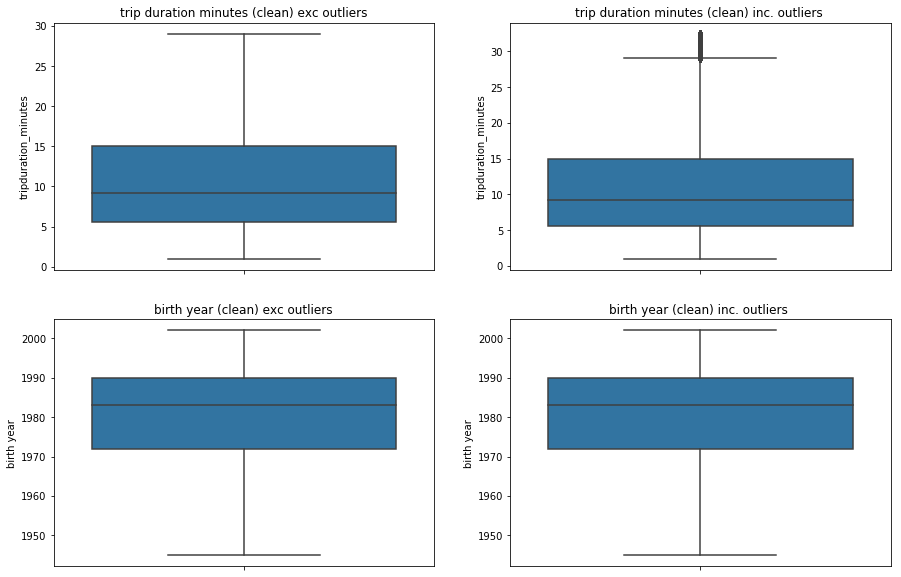

In [24]:
#checking to see the boxplots - much cleaner
fig, axes = plt.subplots(2,2, figsize=(15,10))


sns.boxplot(y='tripduration_minutes', data=bike_clean,showfliers=False,ax= axes [0][0]).set_title('trip duration minutes (clean) exc outliers')
sns.boxplot(y='tripduration_minutes', data=bike_clean,ax = axes [0][1]).set_title('trip duration minutes (clean) inc. outliers ')

sns.boxplot(y='birth year', data=bike_clean,showfliers=False,ax= axes [1][0]).set_title('birth year (clean) exc outliers')
sns.boxplot(y='birth year', data=bike_clean,ax = axes [1][1]).set_title('birth year (clean) inc. outliers ')

In [25]:
bike_clean.shape

(4393060, 35)

In [26]:
bike_clean.head()

,starttime,tripduration,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripduration_minutes,Customer,Subscriber,Gender_unknown,Gender_male,Gender_female,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,holiday,weekend,workday,rushmorning_all,rushmorning_workday,rushevening_all,rushevening_workday
0,2018-09-01 00:00:05.269,1635,2018-09-01 00:27:20.634,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,366.0,Clinton Ave & Myrtle Ave,40.693261,-73.968896,25577,Subscriber,1980,1,27.250000,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
2,2018-09-01 00:00:21.746,436,2018-09-01 00:07:38.583,308.0,St James Pl & Oliver St,40.713079,-73.998512,3690.0,Park Pl & Church St,40.713342,-74.009355,28866,Subscriber,1984,2,7.266667,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
5,2018-09-01 00:00:27.278,233,2018-09-01 00:04:20.742,3526.0,31 St & 23 Ave,40.774788,-73.912555,3532.0,Ditmars Blvd & 19 St,40.781450,-73.918330,29789,Subscriber,1989,1,3.883333,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6,2018-09-01 00:00:31.425,285,2018-09-01 00:05:17.411,358.0,Christopher St & Greenwich St,40.732916,-74.007114,405.0,Washington St & Gansevoort St,40.739323,-74.008119,32861,Subscriber,1991,1,4.750000,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
7,2018-09-01 00:00:30.966,1127,2018-09-01 00:19:18.471,285.0,Broadway & E 14 St,40.734546,-73.990741,405.0,Washington St & Gansevoort St,40.739323,-74.008119,25039,Subscriber,1982,1,18.783333,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


### Doing EDA on the dataset: number of rentals, millenials, gender and subscriber. Also presents a map of all the stations in New York and the top 10 routes.

[Text(0, 0, '2018-09-01 00:00:00'),
 Text(0, 0, '2018-09-02 00:00:00'),
 Text(0, 0, '2018-09-03 00:00:00'),
 Text(0, 0, '2018-09-04 00:00:00'),
 Text(0, 0, '2018-09-05 00:00:00'),
 Text(0, 0, '2018-09-06 00:00:00'),
 Text(0, 0, '2018-09-07 00:00:00'),
 Text(0, 0, '2018-09-08 00:00:00'),
 Text(0, 0, '2018-09-09 00:00:00'),
 Text(0, 0, '2018-09-10 00:00:00'),
 Text(0, 0, '2018-09-11 00:00:00')]

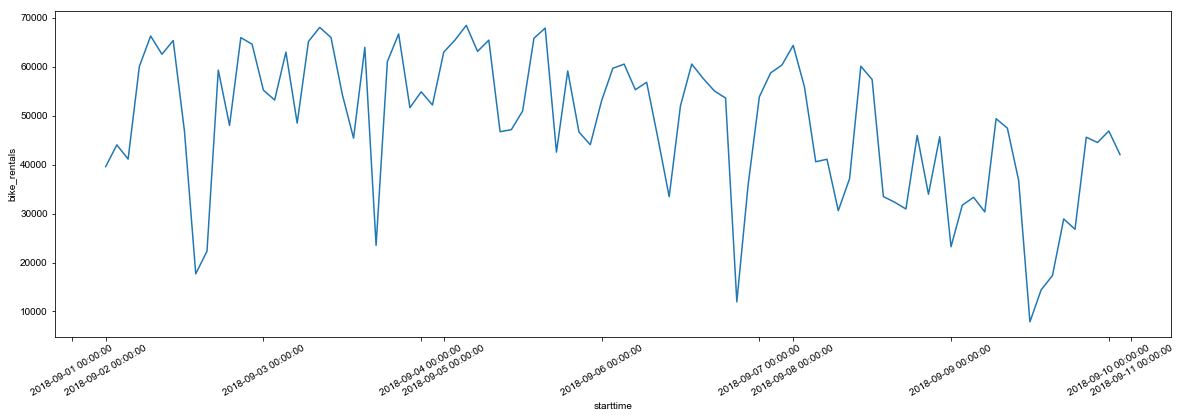

In [27]:
#Checking the 3month rental

biketest = bike_clean.set_index(['starttime'])

bikegroupday = biketest.groupby(pd.Grouper(freq='D')).sum()
bikegroupday['bike_rentals']=bikegroupday['workday']+bikegroupday['holiday']+bikegroupday['weekend']

fig, ax = plt.subplots(figsize=(20, 6))
sns.set(style="darkgrid")
sns.lineplot(x=bikegroupday.index, y=bikegroupday['bike_rentals'],data=bikegroupday).set_xticklabels(labels=bikegroupday.index,rotation=30)

Wall time: 6.1 s


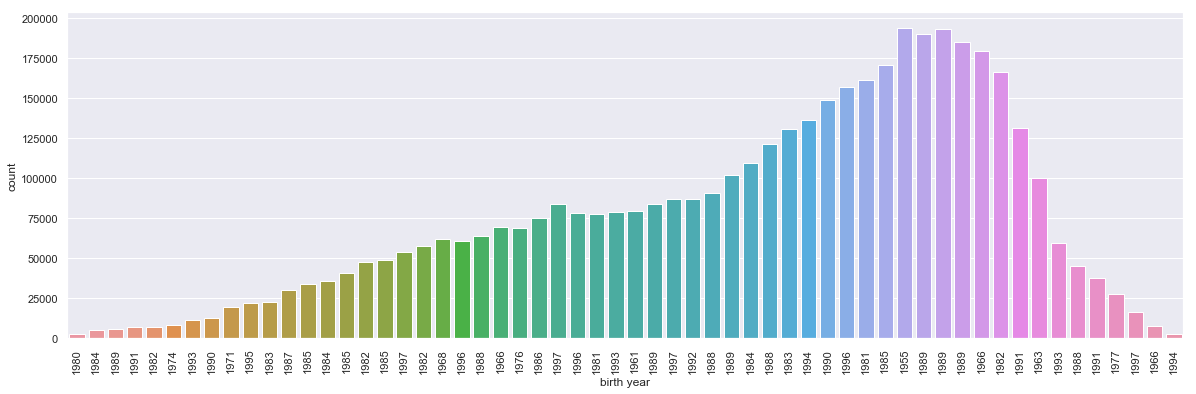

In [28]:
#Checking the distribution of age - mix of both millenials and non-millenials

fig, axes = plt.subplots(figsize=(20,6))
sns.set(style="darkgrid")

sns.countplot(x ='birth year', data=bike_clean).set_xticklabels(labels=bike_clean['birth year'],rotation=90)


Text(0.5, 1.0, 'Rentals by gender')

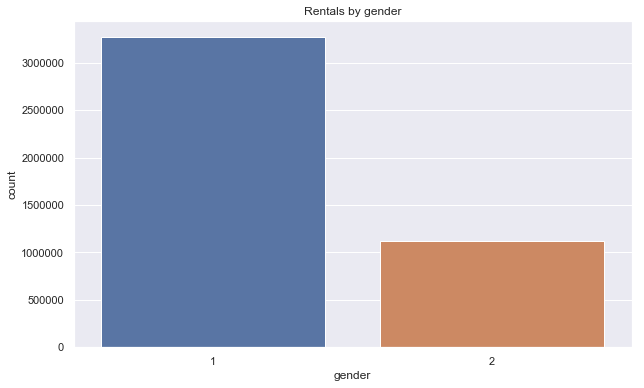

In [29]:
#Overwhelmingly male renters - male =1, female = 2

fig, axes = plt.subplots(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='gender',data=bike_clean).set_title('Rentals by gender')

Text(0.5, 1.0, 'Rentals by Type')

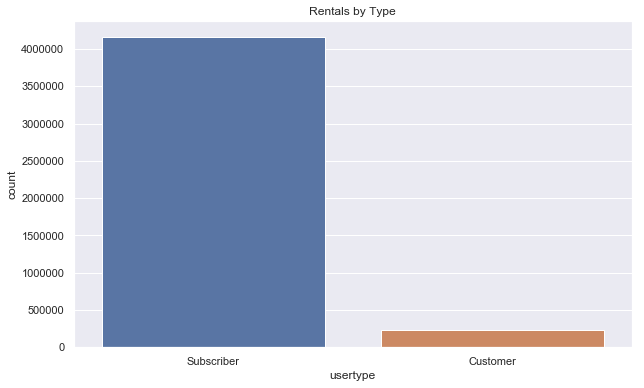

In [30]:
#Subscribers dominate the rentals

fig, axes = plt.subplots(figsize=(10,6))
sns.set(style="darkgrid")
sns.countplot(x='usertype',data=bike_clean).set_title('Rentals by Type')

In [31]:
#Check the physical location of the points
#an html page should pop up

bikelocation = bike_clean[['start station name','start station latitude','start station longitude']]
bikemap = bikelocation.drop_duplicates(subset='start station longitude')


lat_list = bikemap['start station latitude']

lon_list = bikemap['start station longitude']


import matplotlib.pyplot as plt
import mplleaflet
fig = plt.figure()
plt.scatter(lon_list, lat_list, marker='o', c='g') 
mplleaflet.show() 

In [32]:
#Putting in routes and the top 10 routes

bike_clean['route'] = bike_clean['start station name'] + ' - ' + bike_clean['end station name'] 
bike_clean['route'].value_counts().sort_values(ascending=False).head(10)

C:\Users\Monchita\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


E 7 St & Avenue A - Cooper Square & Astor Pl    1799
E 10 St & Avenue A - Lafayette St & E 8 St      1541
S 4 St & Wythe Ave - N 6 St & Bedford Ave       1371
W 21 St & 6 Ave - 9 Ave & W 22 St               1321
N 6 St & Bedford Ave - S 4 St & Wythe Ave       1225
Pershing Square North - W 33 St & 7 Ave         1190
West Thames St - South End Ave & Liberty St     1173
W 16 St & 8 Ave - W 20 St & 11 Ave              1153
Pershing Square North - E 24 St & Park Ave S    1147
W 16 St & 8 Ave - E 16 St & 5 Ave               1119
Name: route, dtype: int64

In [33]:
#saved this to a csv along with the latitude and longitude coordinates
bikemap = pd.read_csv("C:/Users/Monchita/Desktop/Final proj/NYCreal/bikenycmap.csv")
bikemap

,Route,Start lat,start lon,end lat,end lon,Route count
0,E 7 St & Avenue A - Cooper Square & Astor Pl,40.726218,-73.983799,40.729515,-73.990753,1803
1,E 10 St & Avenue A - Lafayette St & E 8 St,40.727408,-73.981420,40.730207,-73.991026,1543
2,S 4 St & Wythe Ave - N 6 St & Bedford Ave,40.712859,-73.965903,40.717452,-73.958509,1375
3,W 21 St & 6 Ave - 9 Ave & W 22 St,40.741740,-73.994156,40.745497,-74.001971,1334
4,N 6 St & Bedford Ave - S 4 St & Wythe Ave,40.717452,-73.958509,40.712859,-73.965903,1229
5,Central Park S & 6 Ave - Central Park S & 6 Ave,40.765909,-73.976342,40.765909,-73.976342,1202
6,Pershing Square North - W 33 St & 7 Ave,40.751873,-73.977706,40.750200,-73.990931,1193
7,West Thames St - South End Ave & Liberty St,40.708347,-74.017134,40.711512,-74.015756,1191
8,W 16 St & 8 Ave - W 20 St & 11 Ave,40.741022,-74.001385,40.746745,-74.007756,1161
9,Pershing Square North - E 24 St & Park Ave S,40.751873,-73.977706,40.740964,-73.986022,1152


In [34]:
#Plots the top 10 routes with lines from the starting station to the end station 
#an html page should pop up

toPlot = zip(bikemap['start lon'], bikemap['Start lat'], bikemap['end lon'], bikemap['end lat'])
for tuple in toPlot:
  plt.plot([tuple[0], tuple[2]], [tuple[1], tuple[3]], 'xk-')
mplleaflet.show()